In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_csv('allData_1.csv')

# Importing the dataset
# X = df.iloc[1:,2:-1].values
# y = df.iloc[1:,-1].values

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [3]:
X.shape

(492, 2)

In [4]:
y.shape

(492,)

# Splitting the dataset into the Training set and Test set

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# Classification

## 1. Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 100)
classifier_tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [11]:
y_pred_tree = classifier_tree.predict([[(0.18441768333333336),(68)]])
print(int(y_pred_tree))

0


## 2. Naive Bays

In [12]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## 3. Random forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100 ,criterion = 'entropy' ,random_state = 100)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

## 4. K-NN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## 5. Suport vactor machine

In [15]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 0)
classifier_svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

# Value Accuracy in 5 classifier

In [12]:
from sklearn.metrics import accuracy_score
def getAcc(y_train, y_model):
    acc =  accuracy_score(y_train,y_model)
    return acc

In [13]:
# 1 Decision tree
y_pred_tree = classifier_tree.predict(X_test)
print(getAcc(y_test, y_pred_tree) * 100 , "%")

100.0 %


In [18]:
# 2 Naive Bay
y_pred_nb = model_nb.predict(X_test)
print(getAcc(y_test, y_pred_nb)* 100 , "%")

98.64864864864865 %


In [19]:
# 3 Random forest
y_pred_rf = classifier_rf.predict(X_test)
print(getAcc(y_test, y_pred_rf)* 100 , "%")

100.0 %


In [20]:
# 4 K-nn ;n = 5
y_pred_knn = classifier_knn.predict(X_test)
print(getAcc(y_test, y_pred_knn)* 100 , "%")

90.54054054054053 %


In [21]:
# 5 Support vactor machine
y_pred_svc = classifier_svc.predict(X_test)
print(getAcc(y_test, y_pred_svc)* 100 , "%")

94.5945945945946 %


# confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_tree)
cm

array([[112,   0],
       [  0,  36]], dtype=int64)

In [2]:
from googletrans import Translator

In [8]:
tran = Translator()
t = tran.translate("mantenance", dest = "th", src = "en")
print(f'{t.text}  and {t.pronunciation}')

ซ่อมบำรุง  and S̀xm bảrung


# Visualization

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

(array([382.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 110.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

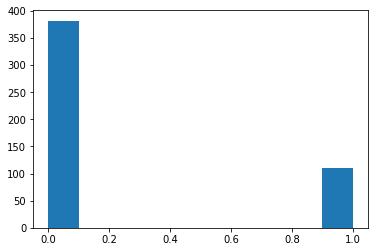

In [63]:
plt.hist(y)

In [109]:
w1 = sum(y[:100])
w2 = sum(y[100:200])
w3 = sum(y[200:300])
w4 = sum(y[300:])
result = [w1,w2,w3,w4]
w = [num for num in range(1,5)]
xx = result
yy = w
w = ['w1','w2','w3','w4']

([<matplotlib.axis.XTick at 0x189a51bbc88>,
 <a list of 4 Text xticklabel objects>)

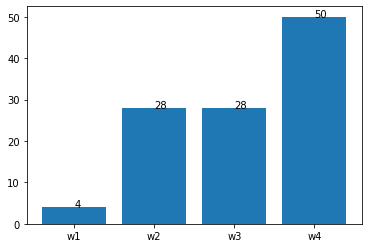

In [126]:
x_pos = [i for i in range(4)]
plt.bar(x_pos,result)
for i in range(len(result)):
    plt.text(x_pos[i], result[i], str(result[i]))
plt.xticks(x_pos,w)